<a href="https://colab.research.google.com/github/AryanAcharya11/ICT_Assignments/blob/main/Iris_Unsupervised_activity_Aryan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
iris_df = sns.load_dataset('iris')

In [ ]:
iris_df.to_csv('iris_df.csv', index=True)

In [ ]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data = iris_df.drop('species', axis=1)
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


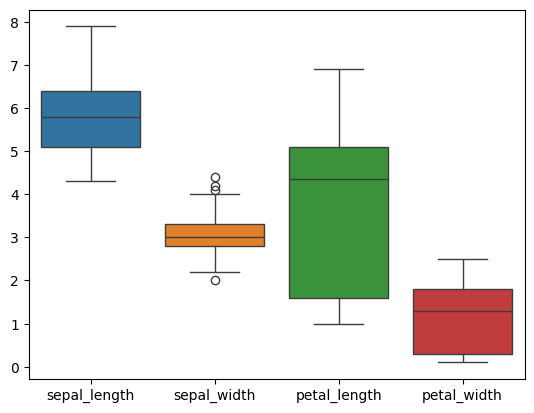

In [ ]:
sns.boxplot(data=data)
plt.show()

In [ ]:
outlier_columns = ['sepal_width']

In [ ]:
def clip_outliers_iqr(df, factor=1.5):
  clipped_df = df.copy()
  if isinstance(clipped_df, pd.Series):
    q1 = clipped_df.quantile(0.25)
    q3 = clipped_df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    clipped_df = np.clip(clipped_df, lower_bound, upper_bound)
  elif isinstance(clipped_df, pd.DataFrame):
    q1 = clipped_df.quantile(0.25)
    q3 = clipped_df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (factor * iqr)
    upper_bound = q3 + (factor * iqr)
    for col in clipped_df.columns:
      clipped_df[col] = np.clip(clipped_df[col], lower_bound[col], upper_bound[col])

  return clipped_df

In [ ]:
data['sepal_width'] = clip_outliers_iqr(data['sepal_width'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
data[['sepal_length', 'sepal_width']] = std_scaler.fit_transform(data[['sepal_length', 'sepal_width']])
data[['petal_length', 'petal_width']] = minmax_scaler.fit_transform(data[['petal_length', 'petal_width']])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.051961,0.067797,0.041667
1,-1.143017,-0.127367,0.067797,0.041667
2,-1.385353,0.344364,0.050847,0.041667
3,-1.506521,0.108498,0.084746,0.041667
4,-1.021849,1.287827,0.067797,0.041667
...,...,...,...,...
145,1.038005,-0.127367,0.711864,0.916667
146,0.553333,-1.306696,0.677966,0.750000
147,0.795669,-0.127367,0.711864,0.791667
148,0.432165,0.816095,0.745763,0.916667


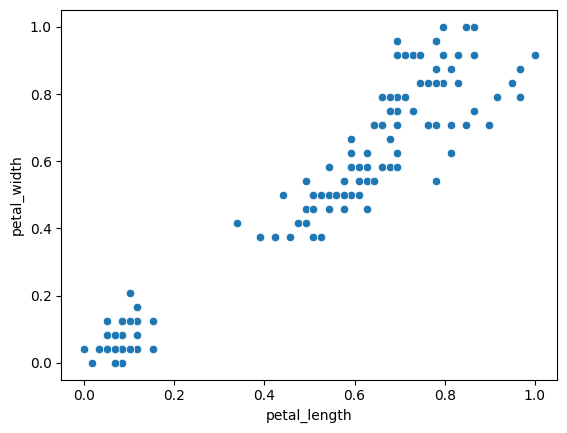

In [ ]:
sns.scatterplot(data=data, x='petal_length', y='petal_width')
plt.show()

In [ ]:
data_2 = data[['sepal_length', 'petal_length', 'petal_width']]

In [ ]:
wcss = []
silhouette_scores = []
for i in range(2, 11):
  k_means = KMeans(n_clusters=i, init='k-means++', random_state=42)
  k_means.fit(data)
  wcss.append(k_means.inertia_)
  score = silhouette_score(data, k_means.labels_)
  silhouette_scores.append(score)

Text(0.5, 0, 'Number of Clusters')

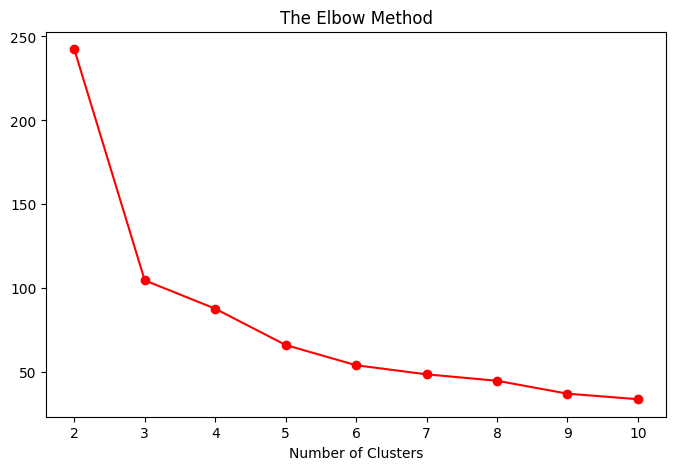

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, color='red', marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')

Text(0.5, 0, 'Number of Clusters')

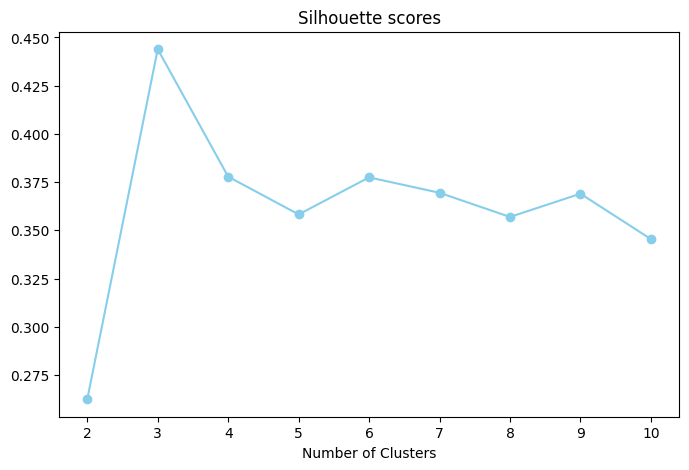

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, color='skyblue', marker='o')
plt.title('Silhouette scores')
plt.xlabel('Number of Clusters')

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(data)
iris_df['Cluster'] = kmeans.predict(data)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,setosa,2
1,4.9,3.0,1.4,0.2,setosa,2
2,4.7,3.2,1.3,0.2,setosa,2
3,4.6,3.1,1.5,0.2,setosa,2
4,5.0,3.6,1.4,0.2,setosa,2


In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:

kmeans.cluster_centers_

array([[ 1.10971635,  0.10849821,  0.75060533,  0.76190476],
       [-0.10143926, -0.95970115,  0.56681877,  0.54647436],
       [-1.00206653,  0.90996015,  0.07886544,  0.06037415]])

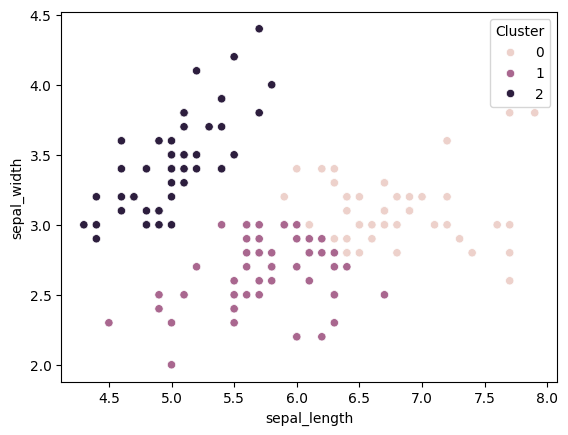

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='Cluster')
plt.show()

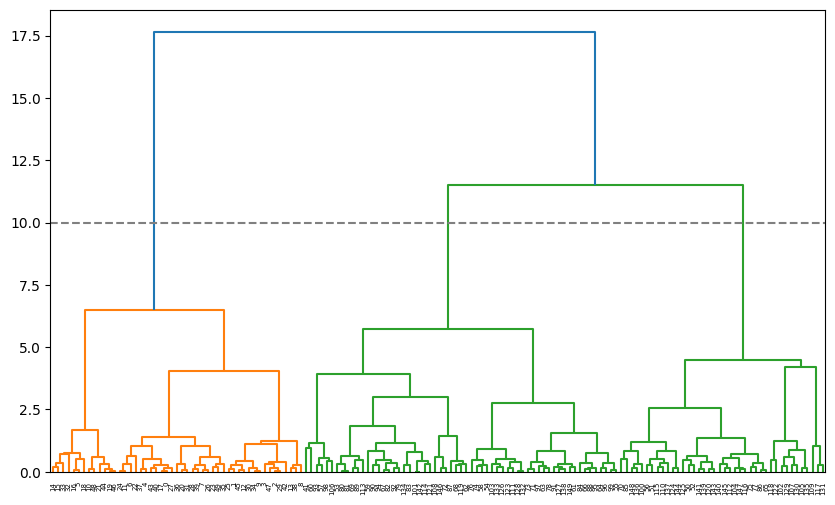

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
mergings = linkage(data, method='ward', optimal_ordering=True)

plt.figure(figsize=(10, 6))
dendrogram(mergings)
plt.axhline(10, color='grey', linestyle='--')
plt.show()

In [ ]:
agg_hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
new_cluster_labels = agg_hc.fit_predict(data)
new_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
iris_df['agg_hc_clusters'] = new_cluster_labels

In [ ]:
iris_df['Cluster'].value_counts()

,count
Cluster,
1,52
2,49
0,49


In [ ]:
iris_df['agg_hc_clusters'].value_counts()

,count
agg_hc_clusters,
1,61
0,49
2,40
